In [79]:
import numpy as np 
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import logbin as lb

plt.rcParams['figure.dpi'] = 300 # 200 e.g. is really fine, but slower

m_array = [2, 4, 8, 16, 32]
colours = ["blue", "orange", "green", "red", "black"]

PHASE 1

LogLog plots of p(k) for varying m

In [80]:
def LoadFreq(isBa, isEr, N, m, runs):

    if isBa:
        filename = "BA_N" + str(N) + "m" + str(m) + "R" + str(runs) + "FREQ.csv"
    elif isEr:
        filename = "ER_N" + str(N) + "m" + str(m) + "R" + str(runs) + "FREQ.csv"
    else:
        filename = "MA_N" + str(N) + "m" + str(m) + "R" + str(runs) + "FREQ.csv"

    df = pd.read_csv(filename)
    df.columns = ["Node","k"]
    df = df.set_index("Node")
    #df = df.reindex(list(range(1,df.index.max()+1)),fill_value=0)

    return df

In [81]:
def TheoreticalLogP(k, m):
    prefac = np.log10(2*m*(m+1))
    k_term = np.log10(k) + np.log10(k+1) + np.log10(k+2)
    return prefac-k_term

def TheoreticalP(k, m):
    prefac = np.log10(2*m*(m+1))
    vals = []
    for i in k:
        k_term = np.log10(i) + np.log10(i+1) + np.log10(i+2)
        vals.append(10**(prefac-k_term))
    return vals

In [78]:
ba_freqs = []
for i in m_array:
    ba_freqs.append(LoadFreq(True, False, 1000000, i, 100))


In [82]:
theory_pk = []
test_array = [] 

for i in range(5):

    testvals = np.arange(m_array[i], max(ba_freqs[i]["k"]))
    test_array.append(max(ba_freqs[i]["k"]))
    theory_pk.append(TheoreticalLogP(testvals, m_array[i]))


    

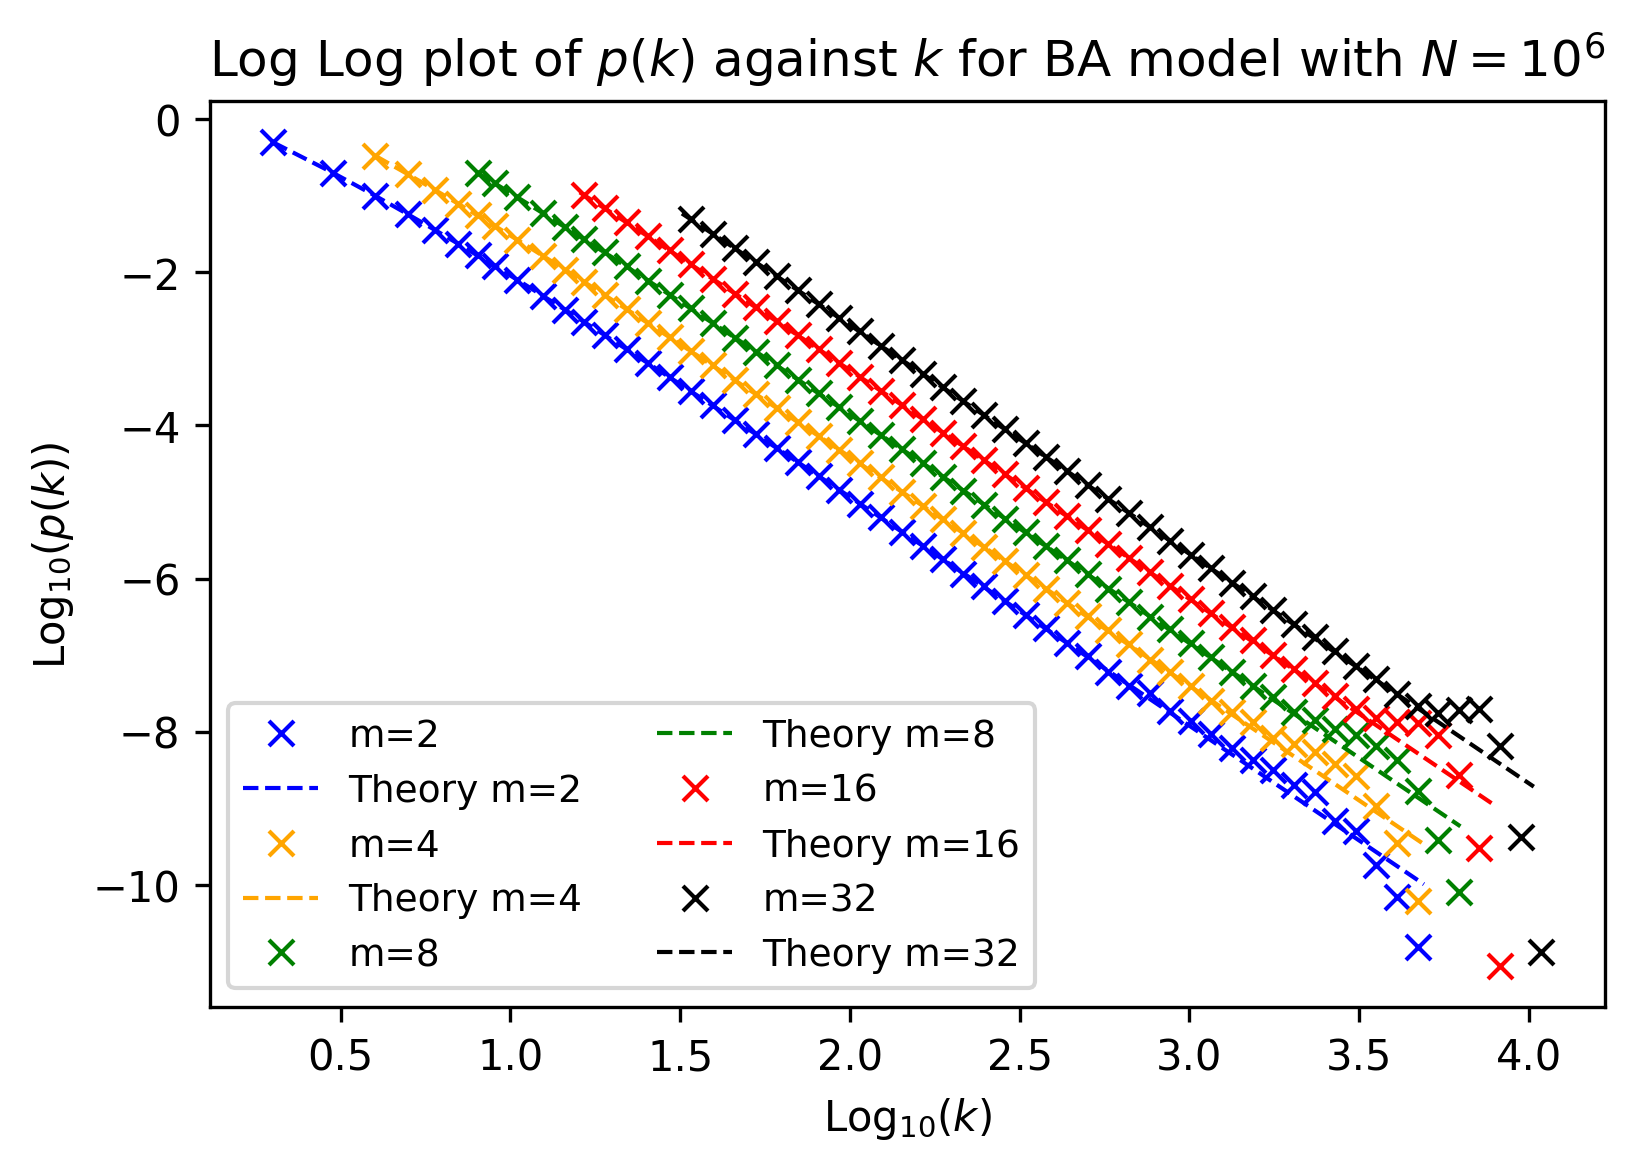

In [52]:
bin_centres = []
true_vals = []
theory_vals = []
log_theory_vals = []

for i in range(5):
    b_centres, b_probs = lb.logbin(ba_freqs[i]["k"], scale = 1.15)
    bin_centres.append(np.array(b_centres))
    true_vals.append(np.array(b_probs))
    log_theory_vals.append(np.array(TheoreticalLogP(b_centres,m_array[i])))
    theory_vals.append(np.array(TheoreticalP(b_centres,m_array[i])))

    plt.plot(np.log10(b_centres), np.log10(b_probs), 'x', label=("m=" + str(m_array[i])), color=colours[i])

    plt.plot(np.log10(np.arange(m_array[i], test_array[i])), theory_pk[i], linestyle='dashed', linewidth=1, color=colours[i], label=("Theory m=" + str(m_array[i])))

plt.legend(fontsize=9, ncol=2, loc=3)
plt.title("Log Log plot of $p(k)$ against $k$ for BA model with $N=10^6$")    
plt.ylabel("Log$_{10}$($p(k)$)")
plt.xlabel("Log$_{10}$($k$)")  
plt.savefig("BA132.png")

In [43]:
residuals = []
for i in range(5):
    residuals.append((true_vals[i] - theory_vals[i])/theory_vals[i])

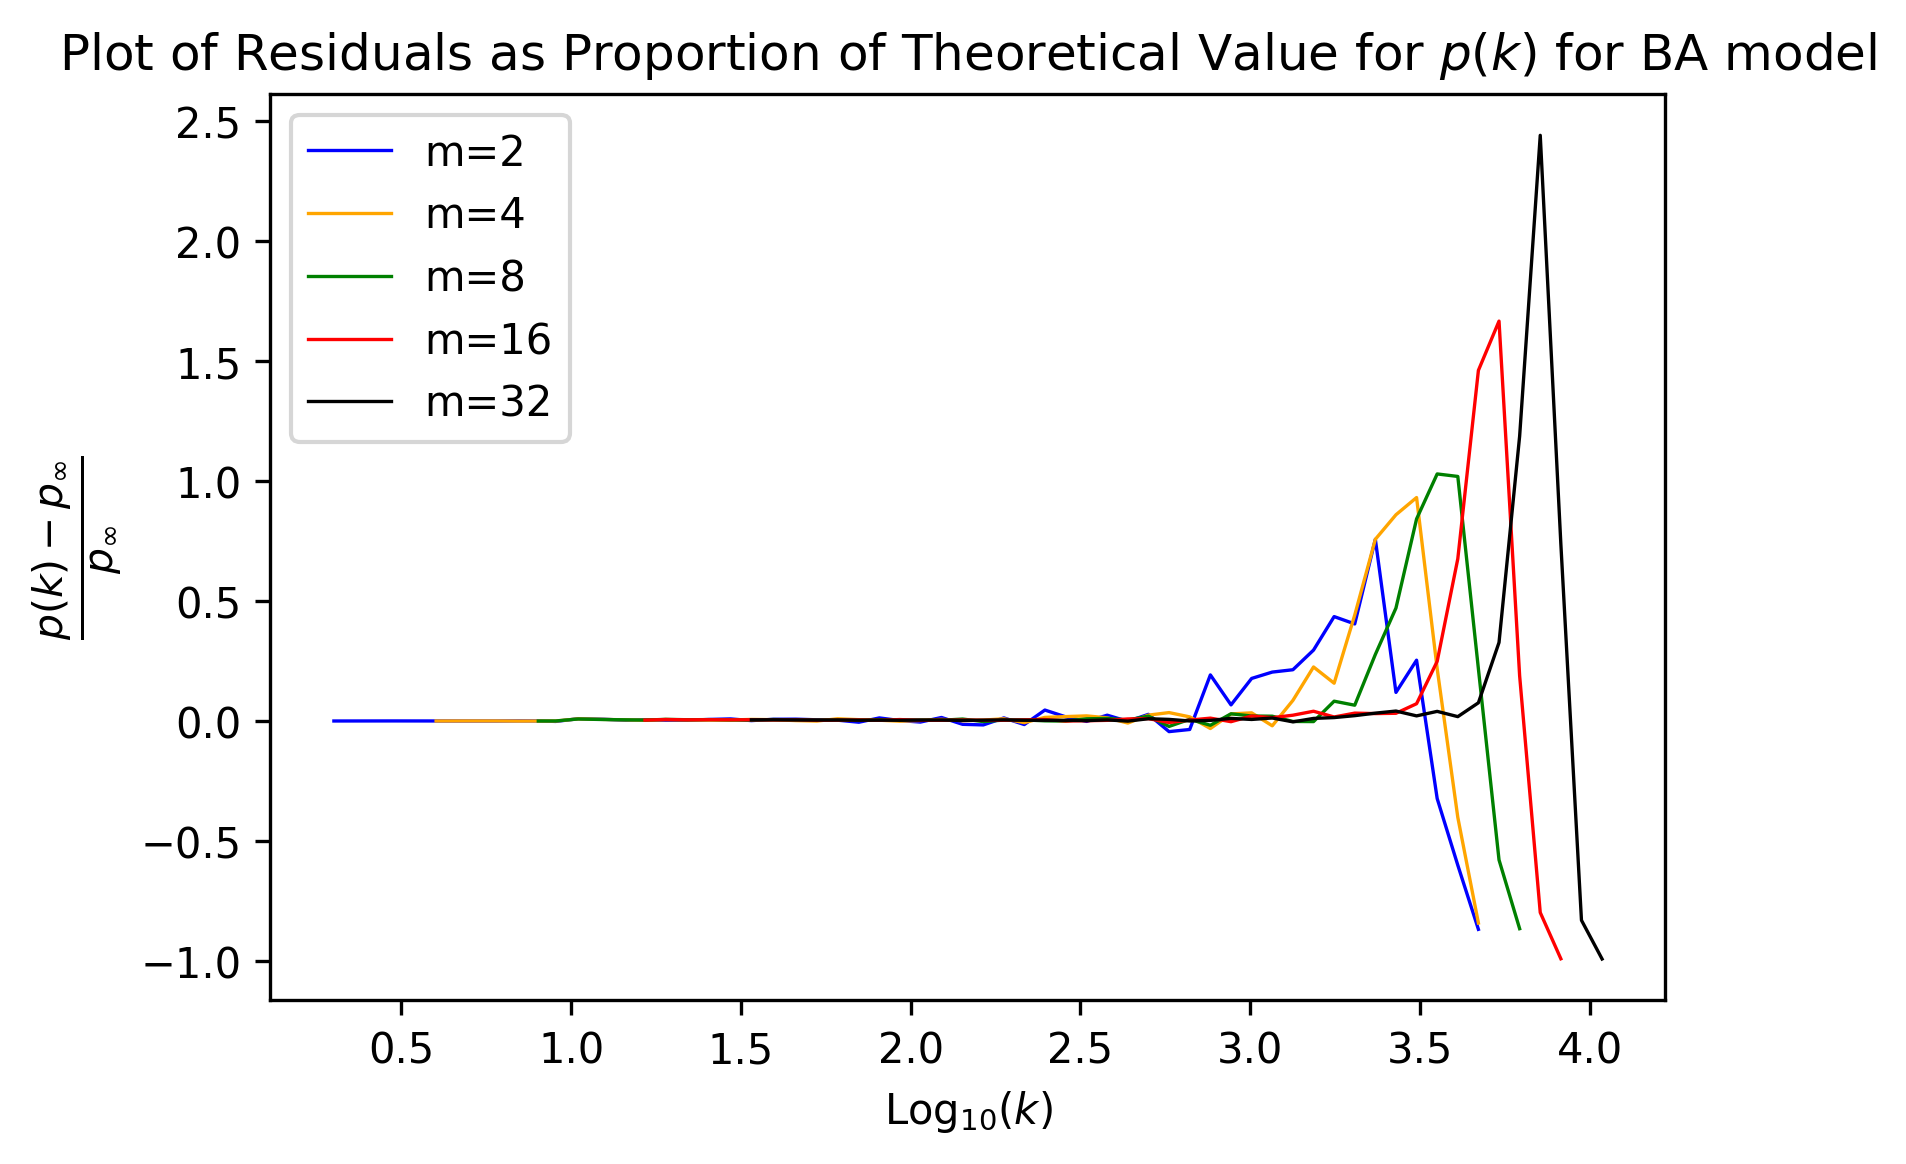

In [76]:
for i in range(5):
    plt.plot(np.log10(bin_centres[i]), residuals[i], label=("m=" + str(m_array[i])), color=colours[i], linewidth=0.8)
plt.legend()
plt.title("Plot of Residuals as Proportion of Theoretical Value for $p(k)$ for BA model")    
plt.xlabel("Log$_{10}$($k$)")  
plt.ylabel(r"$\frac{p(k) - p_{\infty}}{p_{\infty}}$", fontsize=14)  
plt.savefig("2blogt.png")